In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import OrderedDict
from itertools import chain

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
tt = unpickle('cifar-10-batches-py/test_batch')
# print(tt[b'data'])

In [4]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
import multiprocessing as mp

Using TensorFlow backend.


In [5]:
 
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs =10 # repeat 100 times

10000
(32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


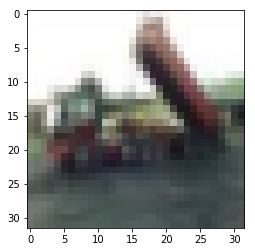

In [9]:
def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic[b'data']
  else:
   train_data = np.vstack((train_data, data_dic[b'data']))
  train_labels += data_dic[b'labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic[b'data']
 test_labels = test_data_dic[b'labels']

 train_data = train_data.reshape((len(train_data), 3, 32,32))
#  print(train_data)
 train_data = np.rollaxis(train_data, 1, 4)
#  print(train_data)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data),3, 32,32))
 print(len(test_data))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape[1:])
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

# In order to check where the data shows an image correctly
plt.imshow(train_data[2])
plt.show()

In [78]:
# print(test_labels.tolist())
print(train_data.dtype)

 
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data=train_data/255
test_data=test_data/255

uint8


In [79]:
# Create the model
from keras import backend as K
K.set_image_dim_ordering('tf')
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


# Fit model

cnn = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_data,test_labels),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_80 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_81 (Dropout)         (None, 512)               0         
__________

In [64]:
train_data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ..., 
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ..., 
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ..., 
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ..., 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ..., 
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ..., 
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ..., 
         [216, 184, 140],
  

In [49]:
test_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [81]:
scores = model.evaluate(test_data, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.73%


In [ ]:
# now using whitening 
